## Análisis de datos - Clase 2

### Análisis de datos faltantes y outliers

---
### 1. Análisis de outliers
---

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [103]:
# Cargamos el dataset de Titanic de Seaborn y el dataset de calidad del aire de Statsmodels
titanic_df = sns.load_dataset('titanic')
airquality_df = sm.datasets.get_rdataset("airquality", "datasets").data # Este lo usaremos como ejemplo de datos temporales

# Le pongo un indice de tipo fechas simplemente porque después lo voy a necesitar para el análisis con missingno
airquality_df.index = pd.date_range(start='1973-05-01', end='1973-09-30', freq='D') # Fecha en formato YYYY-MM-DD


In [104]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
airquality_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1973-05-01,41.0,190.0,7.4,67,5,1
1973-05-02,36.0,118.0,8.0,72,5,2
1973-05-03,12.0,149.0,12.6,74,5,3
1973-05-04,18.0,313.0,11.5,62,5,4
1973-05-05,NaN,NaN,14.3,56,5,5


### 1. Identificación de datos faltantes
---

#### 1.1 Recuento de faltantes: Isnull o Isna?

In [106]:
titanic_df.isnull()  # DataFrame booleano

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [107]:
# Hace lo mismo, es más moderno y el recomendado por Pandas (isnull sigue funcionando pero es considerado legacy)
titanic_df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
# Contar la proporción de valores nulos en cada columna
titanic_df.isna().sum()  

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
# Calcular la proporción de valores nulos en cada columna
titanic_df.isna().mean().round(4)*100  # round(4) redondea a 4 decimales

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64

In [110]:
airquality_df.isna().mean().round(4)*100

Ozone      24.18
Solar.R     4.58
Wind        0.00
Temp        0.00
Month       0.00
Day         0.00
dtype: float64

#### 1.2. Visualización con biblioteca Missingno


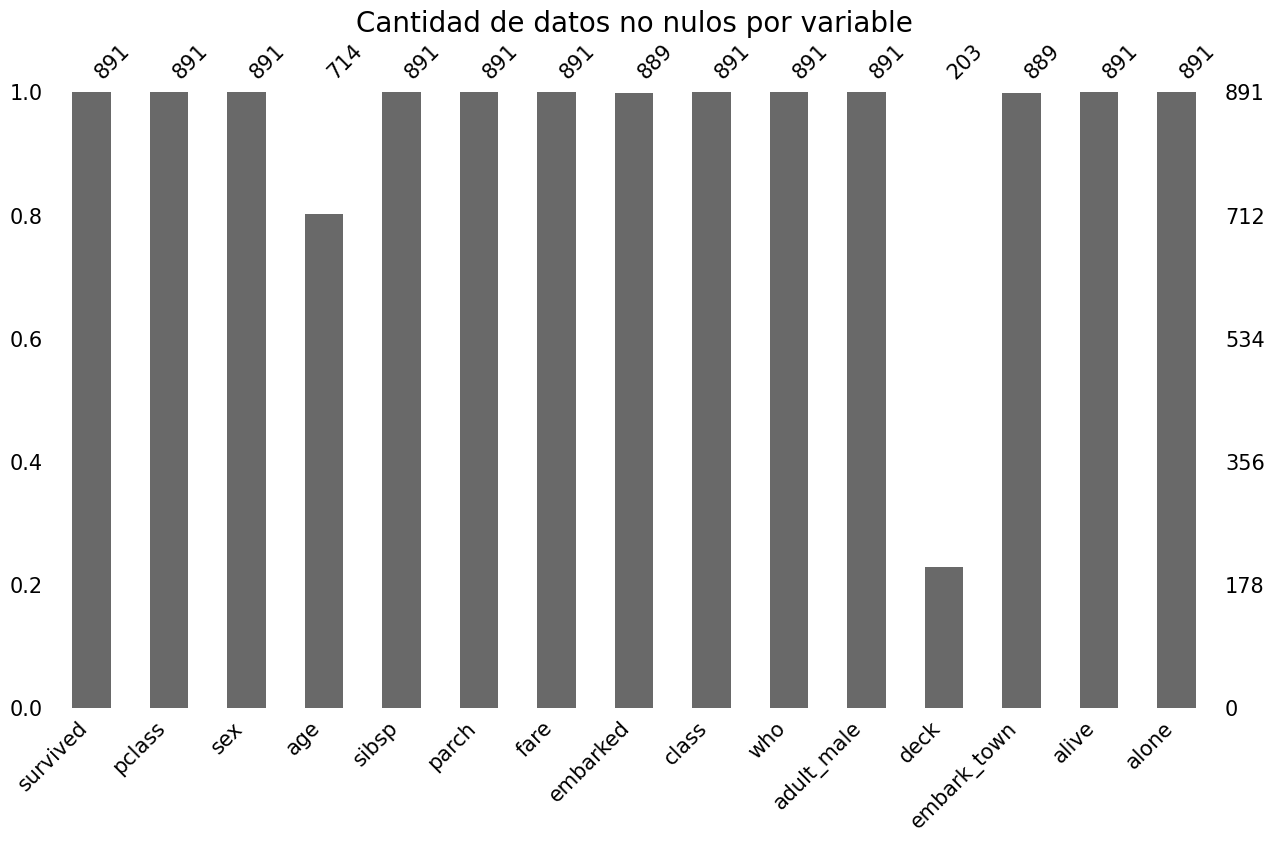

In [111]:
msno.bar(titanic_df, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

<Axes: >

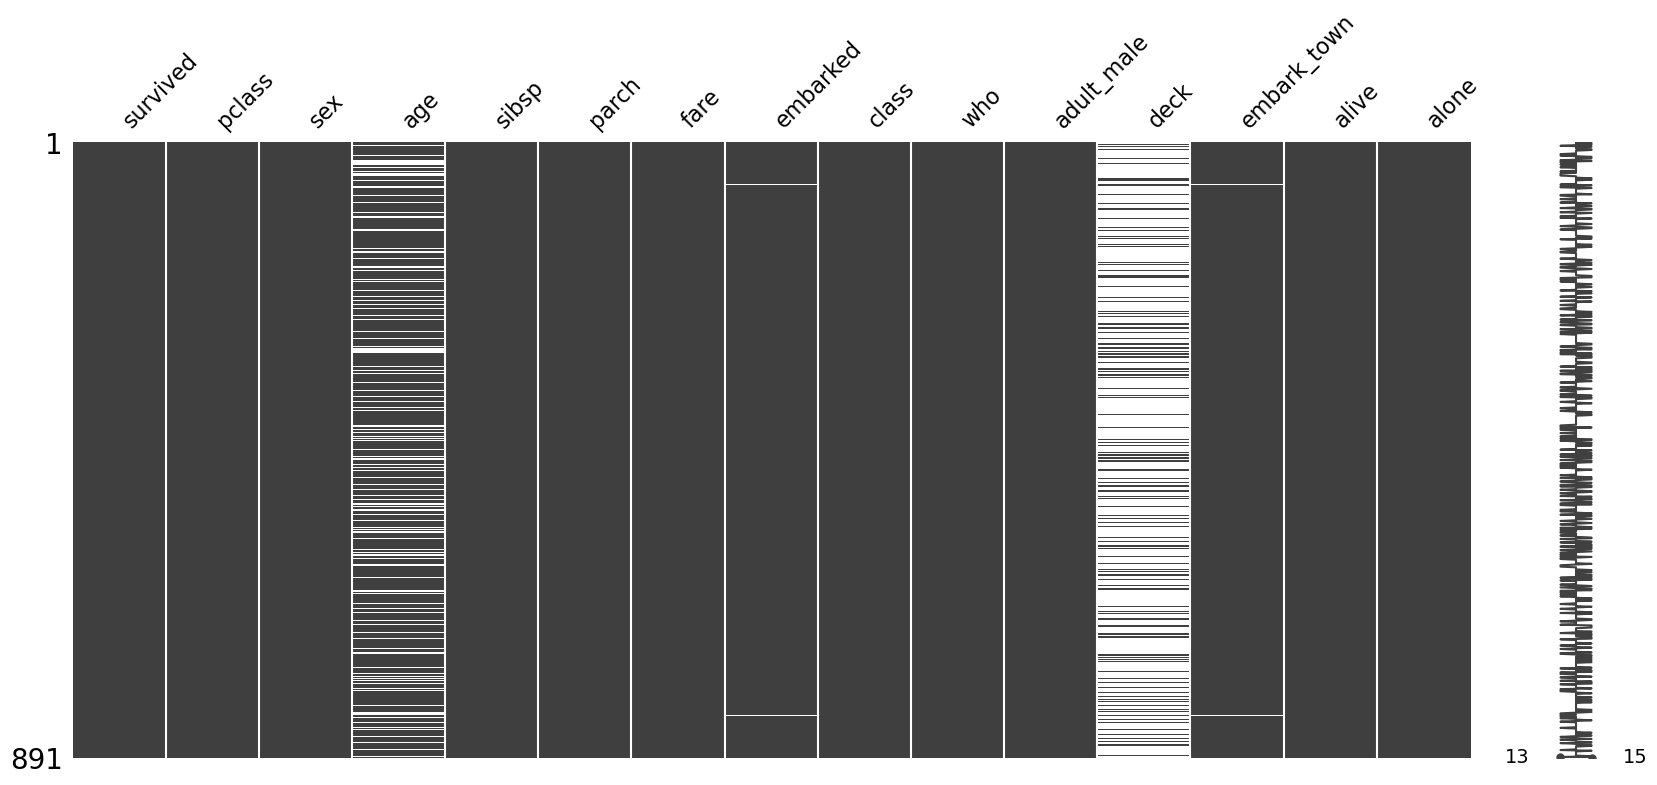

In [112]:
# Matriz de valores faltantes
msno.matrix(titanic_df, figsize=(20,8))

Interpretación:
* La parte sombreada indica datos presentes y las partes blancas los faltantes.
* El gráfico de la derecha (se llama sparkline y se puede deshabilitar con sparkline = False) muestra la completitud de los datos por cada fila y resalta la variación entre su valor mínimo (en este caso, como mínimo hay datos en 13 de las 15 filas) y máximo (está todas las 15 filas completas).

/Users/ari/opt/miniconda3/envs/add-env/lib/python3.11/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/Users/ari/opt/miniconda3/envs/add-env/lib/python3.11/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

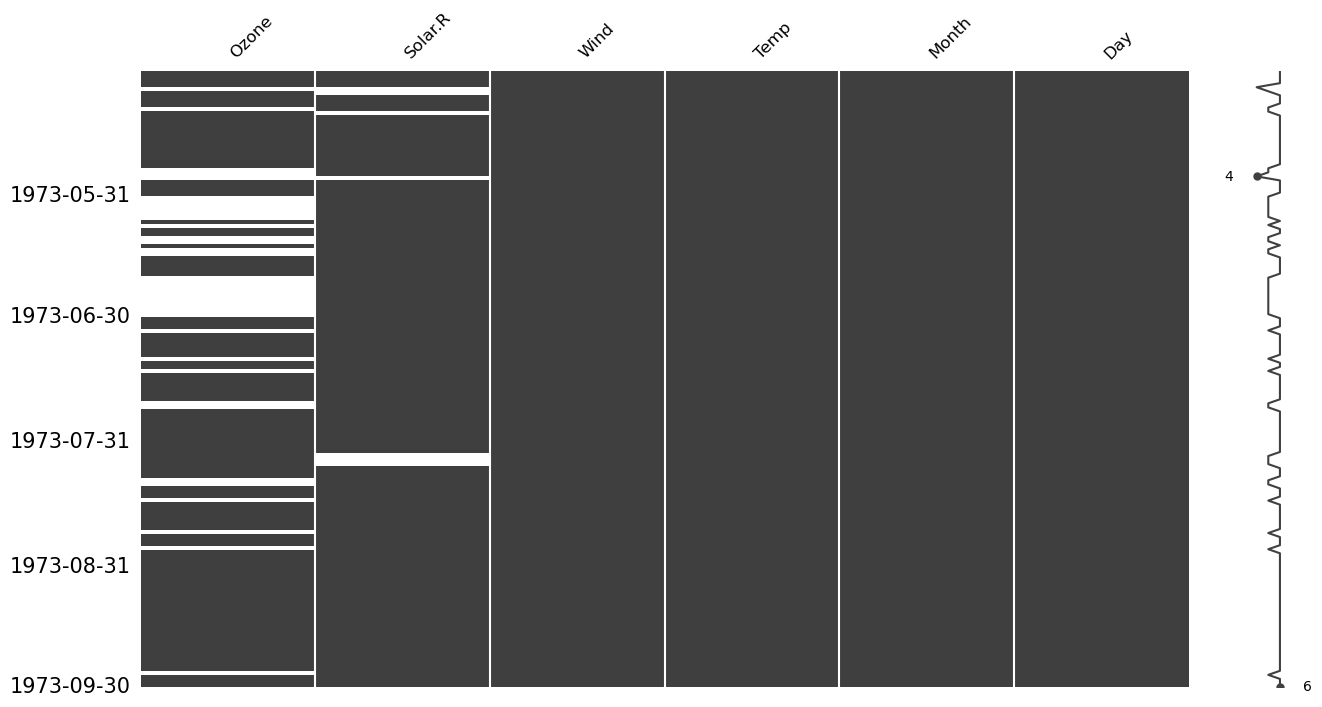

In [113]:
# Por ejemplo en el caso de series temporales, puedo organizar los datos por mes para ver si hay algún patrón
msno.matrix(airquality_df, freq='M', figsize=(15,8), fontsize=12)

/Users/ari/opt/miniconda3/envs/add-env/lib/python3.11/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/Users/ari/opt/miniconda3/envs/add-env/lib/python3.11/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

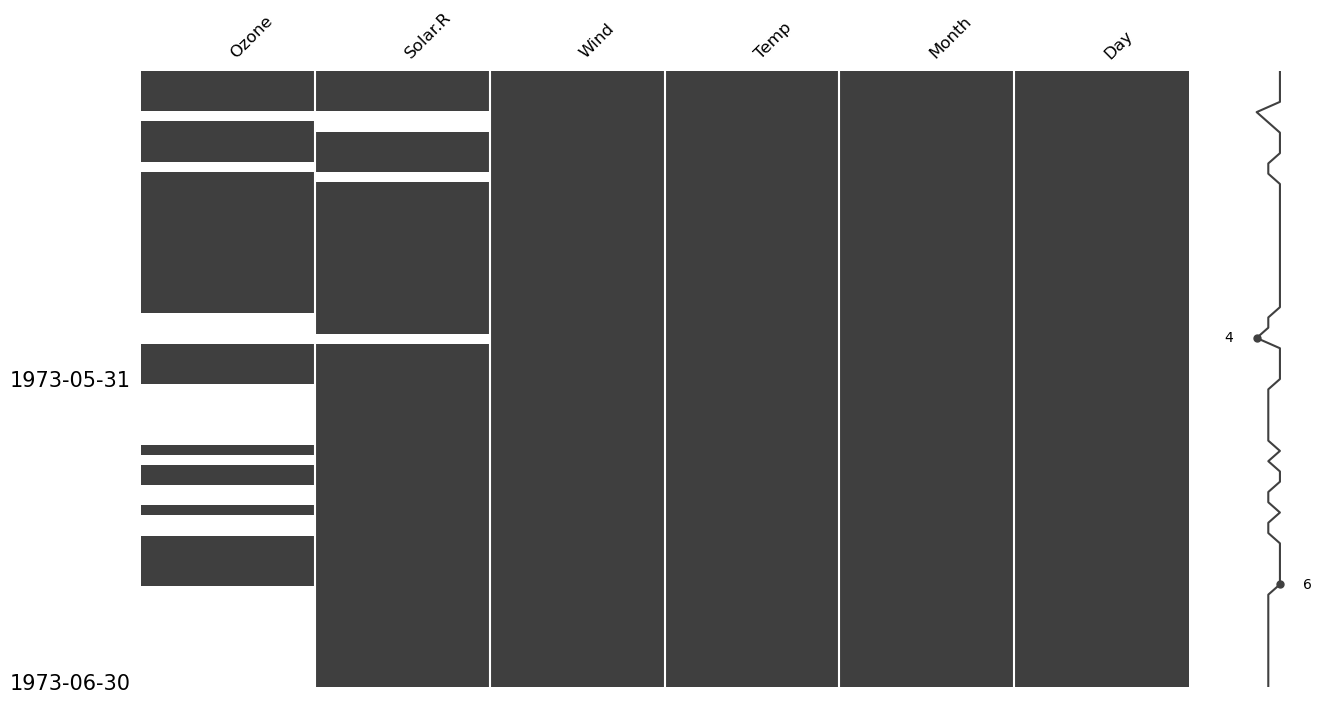

In [114]:
msno.matrix(airquality_df.loc['May-1973':'June-1973'], freq='M', figsize=(15,8), fontsize=12)

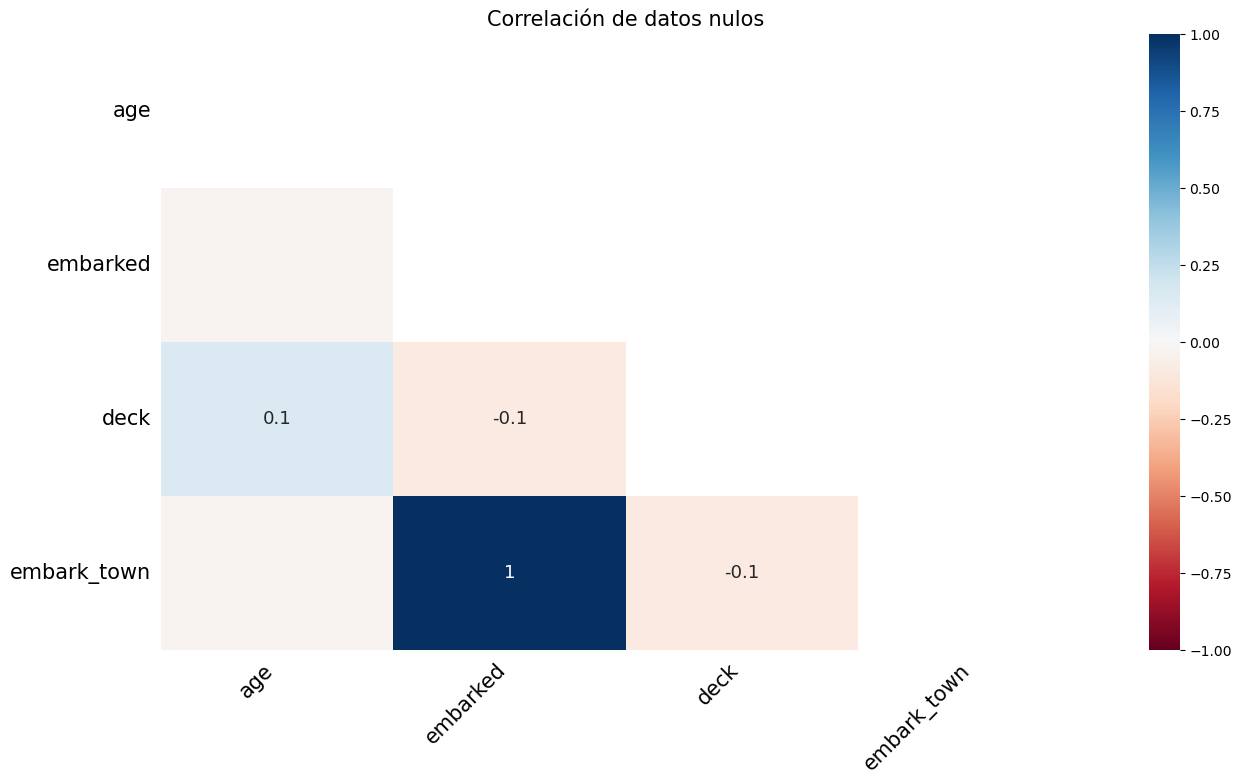

In [115]:
msno.heatmap(titanic_df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

Este gráfico puede ayudar a detectar patrones en los datos faltantes, porque:
* Correlación alta positiva significa que si un valor es nulo en una variable, también lo es en la otra (por ejemplo embarked and embark_town).
* Correlación alta negativa significa que si un valor es nulo en una variable, el otro no lo es.

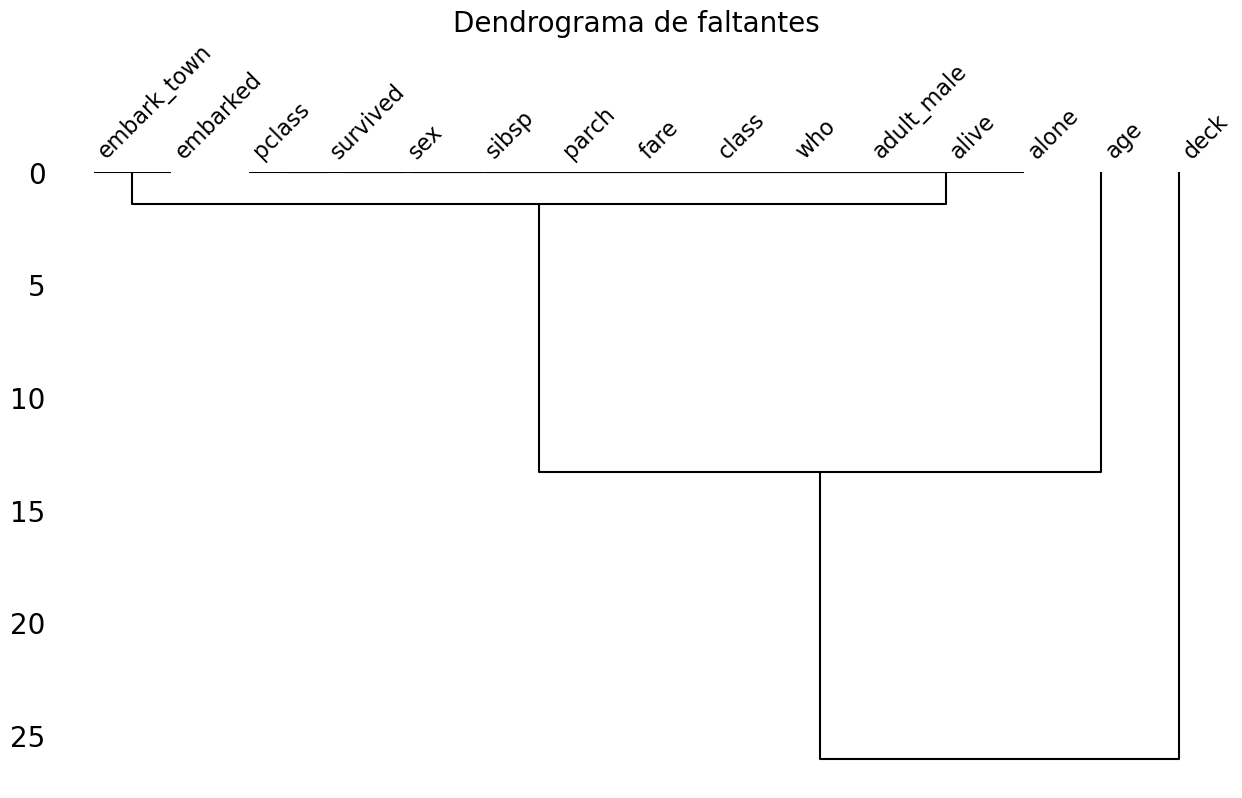

In [116]:

msno.dendrogram(titanic_df, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

Interpretación:

* Las variables se agrupan en clusters (usa un [algortimo de clustering jerárquico](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) basado en correlación de nulos) que tienen patrones de datos faltantes similares. En este caso vemos 4 clusters.

* Se lee desde arriba hacia abajo. El eje vertical representa qué tan distinto es el patrón de faltantes (distancia entre clusters). Las variables que están juntas (unidas por una línea en el cero) se "mueven" perfectamente juntas. Todas tienen nulos o no nulos al mismo tiempo, o cuando una tiene nulos las otras no. 

* Los clusters más cercanos indican un patrón de datos faltantes más parecido.


### 2. Análisis de las causas de los datos faltantes

#### Recordemos los mecanismos:

* MCAR: la falta del dato es aleatoria y no depende de ninguna variable.
* MAR: la falta del dato depende de otras variables observadas.
* MNAR: la falta del dato depende de del dato en sí mismo.


#### En el dataset del Titanic, los faltantes en "Age" y "Deck" son los más importantes.

* Deck tiene un 77% de datos faltantes.
* Age tiene un 19% de datos faltantes. 

1) Son MCAR los datos faltantes? una forma simple de ver esto es analizar el porcentaje de faltantes para distintas "tajadas" del dataset. Si los porcentajes son similares, es probable que los datos sean MCAR. Si no, es probable que sean MAR o MNAR.

In [117]:
# Creamos una función para calcular el porcentaje de nulos en una columna, agrupando por una o más columnas
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )
    return agrupar_nulos


In [118]:
# Ejemplos de análisis que podemos hacer para 'age'
nulos_age_por_sex = nulos_por_grupo(titanic_df, 'sex', 'age')
nulos_age_por_class = nulos_por_grupo(titanic_df, 'class', 'age')
nulos_age_por_embarked = nulos_por_grupo(titanic_df, 'embarked', 'age')
nulos_age_por_sex_class = nulos_por_grupo(titanic_df, ['sex', 'class'], 'age')

# Resultados:
print("Nulos en 'age' por sex:\n", nulos_age_por_sex, "\n")
print("Nulos en 'age' por class:\n", nulos_age_por_class, "\n")
print("Nulos en 'age' por embarked:\n", nulos_age_por_embarked, "\n")
print("Nulos en 'age' por sex and class:\n", nulos_age_por_sex_class, "\n")


Nulos en 'age' por sex:
       sex  porcentaje_nulos_age
0  female             16.878981
1    male             21.490468 

Nulos en 'age' por class:
     class  porcentaje_nulos_age
0   First             13.888889
1  Second              5.978261
2   Third             27.698574 

Nulos en 'age' por embarked:
   embarked  porcentaje_nulos_age
0        C             22.619048
1        Q             63.636364
2        S             13.975155 

Nulos en 'age' por sex and class:
       sex   class  porcentaje_nulos_age
0  female   First              9.574468
1  female  Second              2.631579
2  female   Third             29.166667
3    male   First             17.213115
4    male  Second              8.333333
5    male   Third             27.089337 



In [119]:
# Ejemplos de cosas que podemos mirar para 'deck'
nulos_deck_por_class = nulos_por_grupo(titanic_df, 'class', 'deck')  
nulos_deck_por_embarked = nulos_por_grupo(titanic_df, 'embarked', 'deck')

print("Nulos en 'deck' por class:\n", nulos_deck_por_class, "\n")
print("Nulos en 'deck' por embarked:\n", nulos_deck_por_embarked, "\n")

Nulos en 'deck' por class:
     class  porcentaje_nulos_deck
0   First              18.981481
1  Second              91.304348
2   Third              97.556008 

Nulos en 'deck' por embarked:
   embarked  porcentaje_nulos_deck
0        C              58.928571
1        Q              94.805195
2        S              80.124224 



---
### 2. Análisis de outliers
---

### Métodos estadísticos para detectar outliers

#### Basado en el rango intercuartil

Un dato se considera outlier si es < (Q1 - 1.5 * IQR)) o > (Q3 + 1.5 * IQR)

In [120]:
# Seleccionar variables numéricas relevantes
df = titanic_df[['age', 'fare']]
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [121]:
# Métodos estadísticos para detectar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(f"Outliers\nAge: <{Q1['age'] - 1.5 * IQR['age']:.02f} o >{Q3['age'] + 1.5 * IQR['age']:.02f}")
print(f"Fare: <{Q1['fare'] - 1.5 * IQR['fare']:.02f} o >{Q3['fare'] + 1.5 * IQR['fare']:.02f}")

Outliers
Age: <-6.69 o >64.81
Fare: <-26.72 o >65.63


In [122]:
outliers_iqr

,age,fare
0,False,False
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,False,False
889,False,False


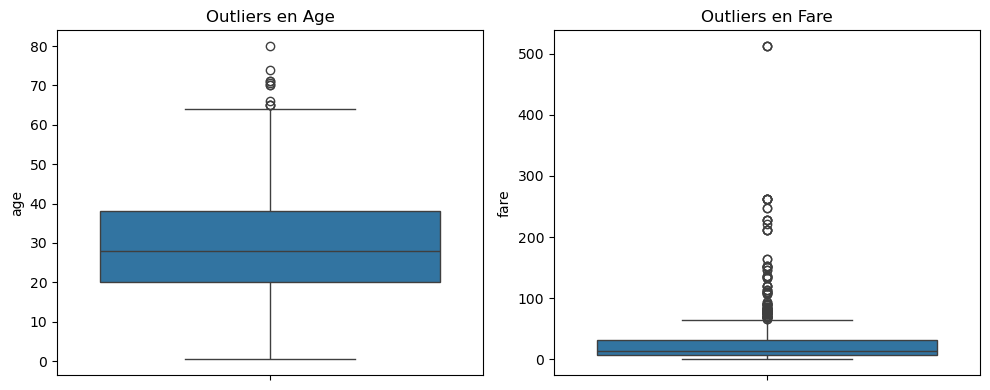

In [123]:
# Visualización de outliers con boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot para 'age'
sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title('Outliers en Age')

# Boxplot para 'fare'
sns.boxplot(y=df['fare'], ax=axes[1])
axes[1].set_title('Outliers en Fare')

plt.tight_layout()
plt.show()

#### Basado en la desviación estándar (distribución normal)

Un dato se considera outlier si es < (mean - 3 * std) o > (mean + 3 * std)

In [124]:
# Método basado en desviación estándar
mean = df.mean()
#std = df.std()
std = df.apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (df < (mean - 3 * std)) | (df > (mean + 3 * std))

print(f"Outliers\nAge: <{mean['age'] - 3 * std['age']:.02f} o >{mean['age'] + 3 * std['age']:.02f}")
print(f"Fare: <{mean['fare'] - 3 * std['fare']:.02f} o >{mean['fare'] + 3 * std['fare']:.02f}")

Outliers
Age: <-13.88 o >73.28
Fare: <-116.88 o >181.28


In [125]:
outliers_std

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,False,False
889,False,False


#### Visualización

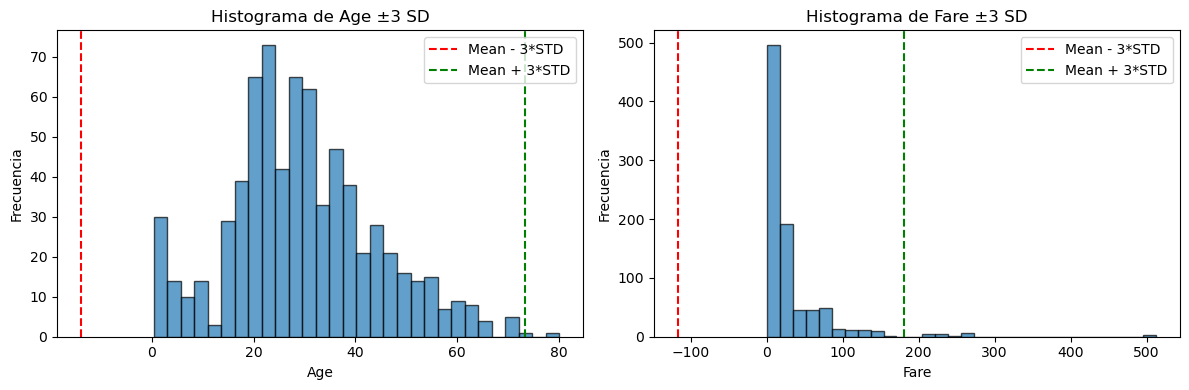

In [126]:
def plot_hist_with_std(ax, data, varname, mean, std):
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(mean[varname] - 3*std[varname], color='red', linestyle='--', label='Mean - 3*STD')
    ax.axvline(mean[varname] + 3*std[varname], color='green', linestyle='--', label='Mean + 3*STD')
    ax.set_xlabel(varname.capitalize())
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {varname.capitalize()} ±3 SD')
    ax.legend()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_hist_with_std(ax[0], df['age'], 'age', mean, std)
plot_hist_with_std(ax[1], df['fare'], 'fare', mean, std)

plt.tight_layout()
plt.show()


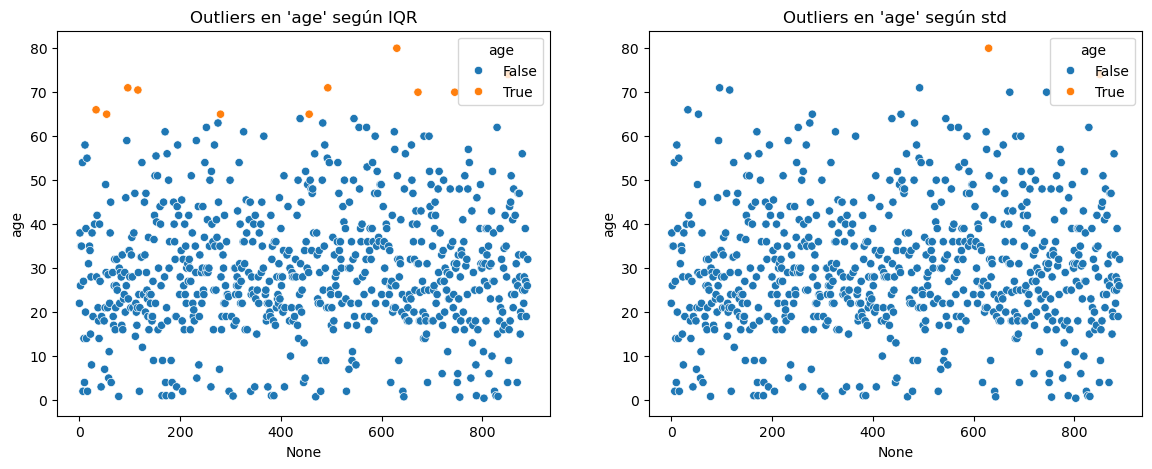

In [127]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=df.index, y=df['age'], hue=outliers_iqr['age'], ax=ax[0])
ax[0].set_title("Outliers en 'age' según IQR")
sns.scatterplot(x=df.index, y=df['age'], hue=outliers_std['age'], ax=ax[1])
ax[1].set_title("Outliers en 'age' según std")
plt.show()

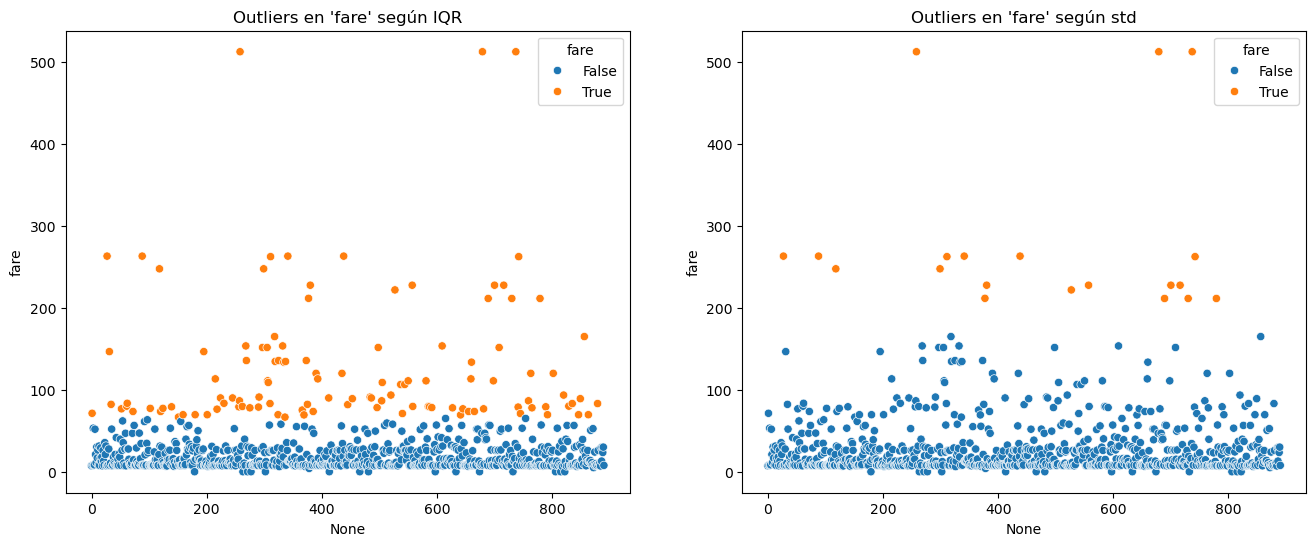

In [128]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=df.index, y=df['fare'], hue=outliers_iqr['fare'], ax=ax[0])
ax[0].set_title("Outliers en 'fare' según IQR")
sns.scatterplot(x=df.index, y=df['fare'], hue=outliers_std['fare'], ax=ax[1])
ax[1].set_title("Outliers en 'fare' según std")
plt.show()